In [1]:
#from datasets import *

import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.algorithms import SklearnSVM
from qiskit.aqua.components.feature_maps import FirstOrderExpansion
from qiskit.aqua.components.feature_maps import SecondOrderExpansion

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

from qiskit import IBMQ

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import SPSA

from sklearn.model_selection import train_test_split

import time

import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

from random import randint

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Import svm model
from sklearn import svm
from sklearn.preprocessing import StandardScaler

from qiskit.circuit.library import ZZFeatureMap, TwoLocal

from random import *

import seaborn

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def rand(x):
    m = 13093
    b = 5
    a = 6679
    return 1 + ((a*(x)+5) % m)

def inv_rand(y):
    m = 13093
    b = 5
    ainv = 10425
    return ainv * (y - 1 - b) % m

def rand2(x):
    m = 16141
    b = 5
    a = 5059
    return 1 + ((a*(x)+5) % m)

def inv_rand(y):
    m = 16141
    b = 5
    ainv = 14115
    return ainv * (y - 1 - b) % m

def modInverse(a, m) : 
    a = a % m; 
    for x in range(1, m) : 
        if ((a * x) % m == 1) : 
            return x 
    return 1

#print(modInverse(5059,16141))

In [3]:
from comparator import compareMethods

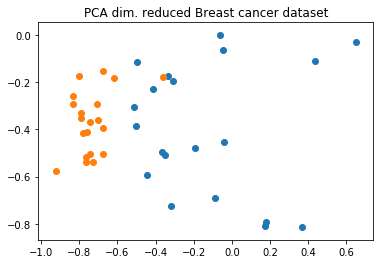

In [5]:
sample_Total, training_input, test_input, class_labels = breast_cancer(
    training_size=20,
    test_size=10,
    n=2,
    plot_data=True
)

set1 = np.concatenate((training_input["A"],test_input["A"]))
set2 = np.concatenate((training_input["B"],test_input["B"]))

In [7]:
IBMQ.save_account('b4b2833475002542a2c0897087ddb9957ff2647c7f6331eb13fbcdc3f4c6da5c337488d9aecaee25878ed3b726221559b50f0d0da1ad0d63f2d3eeda42ea5535')
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_ourense')
compareMethods(set1, set2, backend = backend, name="Breast_Cancer", include_unscaled=True, include_QSVM = False )

configrc.store_credentials:WARNING:2020-11-25 14:02:34,093: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2020-11-25 14:02:34,318: Credentials are already in use. The existing account in the session will be replaced.
The skip Qobj validation does not work for IBMQ provider. Disable it.
FAILURE: Job id: 5fbeaa4c449bae0012b0f6e4 is cancelled. Re-submit the Qobj.


KeyboardInterrupt: 

In [268]:
IBMQ.save_account('b4b2833475002542a2c0897087ddb9957ff2647c7f6331eb13fbcdc3f4c6da5c337488d9aecaee25878ed3b726221559b50f0d0da1ad0d63f2d3eeda42ea5535')
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_16_melbourne')
compareMethods(set1, set2, backend = backend, name="Breast_Cancer", include_unscaled=True, include_VQC = False )

configrc.store_credentials:WARNING:2020-10-06 18:18:50,710: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2020-10-06 18:18:51,099: Credentials are already in use. The existing account in the session will be replaced.
The skip Qobj validation does not work for IBMQ provider. Disable it.
Job limit reached, waiting for job 5f7ced4f7cf6190014533fee to finish before submitting the next one.
Job limit reached, waiting for job 5f7ced4f7cf6190014533fee to finish before submitting the next one.
Job limit reached, waiting for job 5f7ced51cce43d0012c51290 to finish before submitting the next one.
Job limit reached, waiting for job 5f7ced52ba75590013089c3c to finish before submitting the next one.
Job limit reached, waiting for job 5f7ced53d6f779001353caeb to finish before submitting the next one.
Job limit reached, waiting for job 5f7ced541409ae0013ecff65 to finish before submitting the next one.
Job limit reached, waiting for job 5f7cef59ac5dc2001

Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,85.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,85.0,False
"SVM, RBF Kernel",Local Processor,0,85.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,85.0,False
QSVM,ibmq_16_melbourne,4372,70.0,False


[['Algorithm', 'Backend', 'Time', 'Accuracy', 'Only one Class Predicted?'],
 ['SVM, Linear Kernel', 'Local Processor', 0, '85.0', False],
 ['SVM, Linear Kernel, scaled', 'Local Processor', 0, '85.0', False],
 ['SVM, RBF Kernel', 'Local Processor', 0, '85.0', False],
 ['SVM, RBF Kernel, scaled', 'Local Processor', 0, '85.0', False],
 ['QSVM', 'ibmq_16_melbourne', 4372, '70.0', False]]

In [130]:
test = compareMethods(set1, set2, backend = BasicAer.get_backend('qasm_simulator'), name="Breast_Cancer", include_unscaled=True)

Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,85.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,85.0,False
"SVM, RBF Kernel",Local Processor,0,85.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,85.0,False
QSVM,qasm_simulator,11,75.0,False
VQC,qasm_simulator,48,70.0,False


In [23]:
compareMethods(set1, set2, backend = BasicAer.get_backend('statevector_simulator'), name="Breast_Cancer", include_unscaled=True)

Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,85.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,85.0,False
"SVM, RBF Kernel",Local Processor,0,85.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,85.0,False
QSVM,statevector_simulator,0,75.0,False
VQC,statevector_simulator,31,70.0,False


[['Algorithm', 'Backend', 'Time', 'Accuracy', 'Only one Class Predicted?'],
 ['SVM, Linear Kernel', 'Local Processor', 0, '85.0', False],
 ['SVM, Linear Kernel, scaled', 'Local Processor', 0, '85.0', False],
 ['SVM, RBF Kernel', 'Local Processor', 0, '85.0', False],
 ['SVM, RBF Kernel, scaled', 'Local Processor', 0, '85.0', False],
 ['QSVM', 'statevector_simulator', 0, '75.0', False],
 ['VQC', 'statevector_simulator', 31, '70.0', False]]

In [105]:
#Show how algorithm can be extremely volatile

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
backend = backend = provider.get_backend('ibmq_16_melbourne')

class1_train, class1_test = train_test_split(set1, test_size=0.3, random_state=42)
class2_train, class2_test = train_test_split(set2, test_size=0.3, random_state=42)
training_data = {'A': np.asarray(class1_train), 'B': np.asarray(class2_train)}
test_data = {'A': np.asarray(class1_test), 'B': np.asarray(class2_test)}
qsvm = QSVM(feature_map, training_data, test_data)
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)
result = qsvm.run(quantum_instance)
print("Using 30-70 test/train split, random state 42: "+ str(round(100*result['testing_accuracy'], 2)))

class1_train, class1_test = train_test_split(set1, test_size=0.33, random_state=12)
class2_train, class2_test = train_test_split(set2, test_size=0.33, random_state=12)
training_data = {'A': np.asarray(class1_train), 'B': np.asarray(class2_train)}
test_data = {'A': np.asarray(class1_test), 'B': np.asarray(class2_test)}
qsvm = QSVM(feature_map, training_data, test_data)
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)
result = qsvm.run(quantum_instance)
print("Using 33-67 test/train split, random state 12: "+ str(round(100*result['testing_accuracy'], 2)))

class1_train, class1_test = train_test_split(set1, test_size=0.3, random_state=42)
class2_train, class2_test = train_test_split(set2, test_size=0.3, random_state=42)
training_data = {'A': np.asarray(class1_train), 'B': np.asarray(class2_train)}
test_data = {'A': np.asarray(class1_test), 'B': np.asarray(class2_test)}
qsvm = QSVM(feature_map, training_data, test_data)
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)
result = qsvm.run(quantum_instance)
print("Using 30-70 test/train split, random state 42: "+ str(round(100*result['testing_accuracy'], 2)))

The skip Qobj validation does not work for IBMQ provider. Disable it.
Job limit reached, waiting for job 5f667e18e95de6001246d27e to finish before submitting the next one.
Job limit reached, waiting for job 5f667e1a93bcee0012607b59 to finish before submitting the next one.
Job limit reached, waiting for job 5f667e1bc9c81b001418d354 to finish before submitting the next one.
Job limit reached, waiting for job 5f667e1c9d933f0014c2ccd3 to finish before submitting the next one.
Job limit reached, waiting for job 5f667e1e9d933f0014c2ccd4 to finish before submitting the next one.
Job limit reached, waiting for job 5f667e50d9819f00132d8bdb to finish before submitting the next one.
Job limit reached, waiting for job 5f667e83c9c81b001418d35b to finish before submitting the next one.
Job limit reached, waiting for job 5f667e83c9c81b001418d35b to finish before submitting the next one.
Job limit reached, waiting for job 5f668278ba34340013f33101 to finish before submitting the next one.
Job limit re

Using 30-70 test/train split, random state 42: 66.67


Job limit reached, waiting for job 5f668661ba34340013f33133 to finish before submitting the next one.
Job limit reached, waiting for job 5f668661ba34340013f33133 to finish before submitting the next one.
Job limit reached, waiting for job 5f668662c9c81b001418d3bf to finish before submitting the next one.
Job limit reached, waiting for job 5f66866343c9f0001441e76d to finish before submitting the next one.
Job limit reached, waiting for job 5f66866443c9f0001441e76e to finish before submitting the next one.
Job limit reached, waiting for job 5f668665c9c81b001418d3c0 to finish before submitting the next one.
Job limit reached, waiting for job 5f668856d9819f00132d8c63 to finish before submitting the next one.
Job limit reached, waiting for job 5f668856d9819f00132d8c63 to finish before submitting the next one.
The skip Qobj validation does not work for IBMQ provider. Disable it.


Using 33-67 test/train split, random state 12: 85.0


Job limit reached, waiting for job 5f668e82f0489e0013e9fcb5 to finish before submitting the next one.
Job limit reached, waiting for job 5f668e82f0489e0013e9fcb5 to finish before submitting the next one.
Job limit reached, waiting for job 5f668e83e95de6001246d363 to finish before submitting the next one.
Job limit reached, waiting for job 5f668e8443c9f0001441e7d9 to finish before submitting the next one.
Job limit reached, waiting for job 5f668e85d9819f00132d8ca8 to finish before submitting the next one.
Job limit reached, waiting for job 5f668e86d9819f00132d8ca9 to finish before submitting the next one.
Job limit reached, waiting for job 5f669075c428370014759efe to finish before submitting the next one.
Job limit reached, waiting for job 5f669075c428370014759efe to finish before submitting the next one.
Job limit reached, waiting for job 5f6690a938f2ea00126c078c to finish before submitting the next one.


Using 30-70 test/train split, random state 42: 77.78


In [269]:
class1_train, class1_test = train_test_split(set1, test_size=0.3, random_state=12)
class2_train, class2_test = train_test_split(set2, test_size=0.3, random_state=12)
training_data = {'A': np.asarray(class1_train), 'B': np.asarray(class2_train)}
test_data = {'A': np.asarray(class1_test), 'B': np.asarray(class2_test)}
qsvm = QSVM(feature_map, training_data, test_data)
quantum_instance = QuantumInstance(backend = provider.get_backend('ibmq_16_melbourne'), shots=1024, seed_simulator=10598, seed_transpiler=10598)
result = qsvm.run(quantum_instance)
print("Using 30-70 test/train split, random state 12: "+ str(round(100*result['testing_accuracy'], 2)))

The skip Qobj validation does not work for IBMQ provider. Disable it.
Job limit reached, waiting for job 5f7cfe62993b6300133f0567 to finish before submitting the next one.
Job limit reached, waiting for job 5f7cfe62993b6300133f0567 to finish before submitting the next one.
Job limit reached, waiting for job 5f7cfe62993b6300133f0567 to finish before submitting the next one.
Job limit reached, waiting for job 5f7cfe63d41e8d0014d2ed52 to finish before submitting the next one.
Job limit reached, waiting for job 5f7cfe64d41e8d0014d2ed53 to finish before submitting the next one.
Job limit reached, waiting for job 5f7cfe66ba75590013089d0f to finish before submitting the next one.
Job limit reached, waiting for job 5f7cfe671409ae0013ed002f to finish before submitting the next one.
Job limit reached, waiting for job 5f7d01707cf61900145340da to finish before submitting the next one.
Job limit reached, waiting for job 5f7d01707cf61900145340da to finish before submitting the next one.
Job limit re

Using 30-70 test/train split, random state 12: 72.22


In [5]:
#Show how algorithm can be extremely volatile

feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
backend = BasicAer.get_backend('statevector_simulator')

class1_train, class1_test = train_test_split(set1, test_size=0.3, random_state=42)
class2_train, class2_test = train_test_split(set2, test_size=0.3, random_state=42)
training_data = {'A': np.asarray(class1_train), 'B': np.asarray(class2_train)}
test_data = {'A': np.asarray(class1_test), 'B': np.asarray(class2_test)}
qsvm = QSVM(feature_map, training_data, test_data)
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)
result = qsvm.run(quantum_instance)
print("Using 30-70 test/train split, random state 42: "+ str(round(100*result['testing_accuracy'], 2)))

class1_train, class1_test = train_test_split(set1, test_size=0.33, random_state=12)
class2_train, class2_test = train_test_split(set2, test_size=0.33, random_state=12)
training_data = {'A': np.asarray(class1_train), 'B': np.asarray(class2_train)}
test_data = {'A': np.asarray(class1_test), 'B': np.asarray(class2_test)}
qsvm = QSVM(feature_map, training_data, test_data)
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)
result = qsvm.run(quantum_instance)
print("Using 33-67 test/train split, random state 12: "+ str(round(100*result['testing_accuracy'], 2)))

class1_train, class1_test = train_test_split(set1, test_size=0.3, random_state=12)
class2_train, class2_test = train_test_split(set2, test_size=0.3, random_state=12)
training_data = {'A': np.asarray(class1_train), 'B': np.asarray(class2_train)}
test_data = {'A': np.asarray(class1_test), 'B': np.asarray(class2_test)}
qsvm = QSVM(feature_map, training_data, test_data)
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=10598, seed_transpiler=10598)
result = qsvm.run(quantum_instance)
print("Using 30-70 test/train split, random state 12: "+ str(round(100*result['testing_accuracy'], 2)))

Using 30-70 test/train split, random state 42: 72.22
Using 33-67 test/train split, random state 12: 75.0
Using 30-70 test/train split, random state 12: 66.67


In [5]:
SizeData = []

for i in np.arange(1, 13, 0.5).tolist():
    sample_Total, training_input, test_input, class_labels = breast_cancer(
        training_size=int(20*i),
        test_size=int(10*i),
        n=2,
        plot_data=False
    )
    
    set1 = np.concatenate((training_input["A"],test_input["A"]))
    set2 = np.concatenate((training_input["B"],test_input["B"]))
    print(str(len(set1)+len(set2)) + " data points")
    iter_data = compareMethods(set1, set2, name="Breast_Cancer_Factor"+str(i), include_unscaled=True)
    SizeData.append([len(set1)+len(set2), iter_data[2][3], iter_data[4][3], iter_data[5][2], iter_data[5][3],
                   iter_data[6][2], iter_data[6][3]])

60 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,85.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,85.0,False
"SVM, RBF Kernel",Local Processor,0,85.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,85.0,False
QSVM,qasm_simulator,12,75.0,False
VQC,qasm_simulator,50,70.0,False


90 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,100.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,100.0,False
"SVM, RBF Kernel",Local Processor,0,100.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,100.0,False
QSVM,qasm_simulator,29,86.67,False
VQC,qasm_simulator,81,90.0,False


120 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,97.5,False
"SVM, Linear Kernel, scaled",Local Processor,0,97.5,False
"SVM, RBF Kernel",Local Processor,0,97.5,False
"SVM, RBF Kernel, scaled",Local Processor,0,97.5,False
QSVM,qasm_simulator,50,87.5,False
VQC,qasm_simulator,106,82.5,False


150 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,94.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,92.0,False
"SVM, RBF Kernel",Local Processor,0,94.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,92.0,False
QSVM,qasm_simulator,93,84.0,False
VQC,qasm_simulator,162,84.0,False


180 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,93.33,False
"SVM, Linear Kernel, scaled",Local Processor,0,93.33,False
"SVM, RBF Kernel",Local Processor,0,93.33,False
"SVM, RBF Kernel, scaled",Local Processor,0,93.33,False
QSVM,qasm_simulator,135,86.67,False
VQC,qasm_simulator,188,86.67,False


210 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,94.29,False
"SVM, Linear Kernel, scaled",Local Processor,0,95.71,False
"SVM, RBF Kernel",Local Processor,0,92.86,False
"SVM, RBF Kernel, scaled",Local Processor,0,92.86,False
QSVM,qasm_simulator,184,85.71,False
VQC,qasm_simulator,219,78.57,False


240 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,88.75,False
"SVM, Linear Kernel, scaled",Local Processor,0,92.5,False
"SVM, RBF Kernel",Local Processor,0,88.75,False
"SVM, RBF Kernel, scaled",Local Processor,0,90.0,False
QSVM,qasm_simulator,234,81.25,False
VQC,qasm_simulator,249,78.75,False


270 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,94.44,False
"SVM, Linear Kernel, scaled",Local Processor,0,94.44,False
"SVM, RBF Kernel",Local Processor,0,93.33,False
"SVM, RBF Kernel, scaled",Local Processor,0,95.56,False
QSVM,qasm_simulator,306,76.67,False
VQC,qasm_simulator,281,86.67,False


300 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,92.0,False
"SVM, Linear Kernel, scaled",Local Processor,0,94.0,False
"SVM, RBF Kernel",Local Processor,0,92.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,95.0,False
QSVM,qasm_simulator,380,78.0,False
VQC,qasm_simulator,313,84.0,False


330 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,90.91,False
"SVM, Linear Kernel, scaled",Local Processor,0,92.73,False
"SVM, RBF Kernel",Local Processor,0,91.82,False
"SVM, RBF Kernel, scaled",Local Processor,0,89.09,False
QSVM,qasm_simulator,454,85.45,False
VQC,qasm_simulator,344,76.36,False


360 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,93.33,False
"SVM, Linear Kernel, scaled",Local Processor,0,95.83,False
"SVM, RBF Kernel",Local Processor,0,93.33,False
"SVM, RBF Kernel, scaled",Local Processor,0,92.5,False
QSVM,qasm_simulator,551,81.67,False
VQC,qasm_simulator,377,82.5,False


389 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,93.85,False
"SVM, Linear Kernel, scaled",Local Processor,0,94.62,False
"SVM, RBF Kernel",Local Processor,0,93.85,False
"SVM, RBF Kernel, scaled",Local Processor,0,94.62,False
QSVM,qasm_simulator,639,83.08,False
VQC,qasm_simulator,405,80.0,False


414 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,93.48,False
"SVM, Linear Kernel, scaled",Local Processor,0,94.2,False
"SVM, RBF Kernel",Local Processor,0,93.48,False
"SVM, RBF Kernel, scaled",Local Processor,0,92.75,False
QSVM,qasm_simulator,727,86.23,False
VQC,qasm_simulator,430,85.51,False


437 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,96.55,False
"SVM, Linear Kernel, scaled",Local Processor,0,97.24,False
"SVM, RBF Kernel",Local Processor,0,96.55,False
"SVM, RBF Kernel, scaled",Local Processor,0,95.86,False
QSVM,qasm_simulator,800,83.45,False
VQC,qasm_simulator,457,82.76,False


452 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,96.67,False
"SVM, Linear Kernel, scaled",Local Processor,0,97.33,False
"SVM, RBF Kernel",Local Processor,0,96.67,False
"SVM, RBF Kernel, scaled",Local Processor,0,96.0,False
QSVM,qasm_simulator,851,72.67,False
VQC,qasm_simulator,474,81.33,False


467 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,96.77,False
"SVM, Linear Kernel, scaled",Local Processor,0,97.42,False
"SVM, RBF Kernel",Local Processor,0,96.77,False
"SVM, RBF Kernel, scaled",Local Processor,0,96.13,False
QSVM,qasm_simulator,907,68.39,False
VQC,qasm_simulator,486,80.65,False


482 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,96.25,False
"SVM, Linear Kernel, scaled",Local Processor,0,96.25,False
"SVM, RBF Kernel",Local Processor,0,96.88,False
"SVM, RBF Kernel, scaled",Local Processor,0,95.62,False
QSVM,qasm_simulator,998,83.12,False
VQC,qasm_simulator,505,81.25,False


497 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,96.36,False
"SVM, Linear Kernel, scaled",Local Processor,0,95.76,False
"SVM, RBF Kernel",Local Processor,0,96.36,False
"SVM, RBF Kernel, scaled",Local Processor,0,94.55,False
QSVM,qasm_simulator,1043,65.45,False
VQC,qasm_simulator,518,81.21,False


512 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,97.04,False
"SVM, Linear Kernel, scaled",Local Processor,0,95.86,False
"SVM, RBF Kernel",Local Processor,0,96.45,False
"SVM, RBF Kernel, scaled",Local Processor,0,94.67,False
QSVM,qasm_simulator,1115,56.8,False
VQC,qasm_simulator,537,79.29,False


527 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,95.98,False
"SVM, Linear Kernel, scaled",Local Processor,0,95.98,False
"SVM, RBF Kernel",Local Processor,0,95.98,False
"SVM, RBF Kernel, scaled",Local Processor,0,94.83,False
QSVM,qasm_simulator,1207,56.32,False
VQC,qasm_simulator,552,81.03,False


539 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,95.51,False
"SVM, Linear Kernel, scaled",Local Processor,0,95.51,False
"SVM, RBF Kernel",Local Processor,0,95.51,False
"SVM, RBF Kernel, scaled",Local Processor,0,94.94,False
QSVM,qasm_simulator,1235,83.15,False
VQC,qasm_simulator,564,80.9,False


549 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,95.05,False
"SVM, Linear Kernel, scaled",Local Processor,0,94.51,False
"SVM, RBF Kernel",Local Processor,0,95.6,False
"SVM, RBF Kernel, scaled",Local Processor,0,93.96,False
QSVM,qasm_simulator,1275,70.33,False
VQC,qasm_simulator,573,82.97,False


559 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,95.68,False
"SVM, Linear Kernel, scaled",Local Processor,0,94.59,False
"SVM, RBF Kernel",Local Processor,0,94.59,False
"SVM, RBF Kernel, scaled",Local Processor,0,95.14,False
QSVM,qasm_simulator,1319,65.41,False
VQC,qasm_simulator,586,82.16,False


569 data points


Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,94.68,False
"SVM, Linear Kernel, scaled",Local Processor,0,94.68,False
"SVM, RBF Kernel",Local Processor,0,93.09,False
"SVM, RBF Kernel, scaled",Local Processor,0,94.15,False
QSVM,qasm_simulator,1363,47.87,False
VQC,qasm_simulator,596,82.98,False


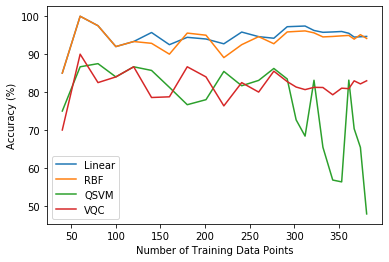

In [14]:
plot_data = np.array(SizeData).astype(float)

x = np.floor(0.67*plot_data[:,0])

plt.plot(x, plot_data[:, 1], label = "Linear")
plt.plot(x, plot_data[:, 2], label = "RBF")
plt.plot(x, plot_data[:, 4], label = "QSVM")
plt.plot(x, plot_data[:, 6], label = "VQC")


plt.xlabel("Number of Training Data Points")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.savefig('breast_cancer_accuracy.png', bbox_inches='tight')
plt.show()

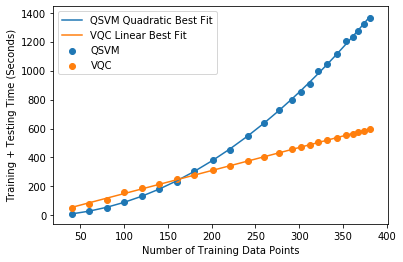

In [20]:
plt.scatter(x, plot_data[:, 3], label = "QSVM")
plt.scatter(x, plot_data[:, 5], label = "VQC")

QSVMFit = np.polyfit(x, plot_data[:, 3], 2)
VQCFit = np.polyfit(x, plot_data[:, 5], 1)
QSVMPoly = np.poly1d(QSVMFit)
VQCPoly = np.poly1d(VQCFit)

plt.plot(x, QSVMPoly(x) , label = "QSVM Quadratic Best Fit")
plt.plot(x, VQCPoly(x), label = "VQC Linear Best Fit")

plt.xlabel("Number of Training Data Points")
plt.ylabel("Training + Testing Time (Seconds)")
plt.legend()

plt.savefig('breast_cancer_time.png', bbox_inches='tight')
plt.show()

In [24]:
FeatureSizeData = []

for i in np.arange(2, 15, 1).tolist():
    sample_Total, training_input, test_input, class_labels = breast_cancer(
        training_size=20,
        test_size=10,
        n=i,
        plot_data=False
    )
    
    set1 = np.concatenate((training_input["A"],test_input["A"]))
    set2 = np.concatenate((training_input["B"],test_input["B"]))
    print("Feature Dimension: " +str(i))
    iter_data = compareMethods(set1, set2, name="Breast_Cancer_Feature_Dim"+str(i), include_unscaled=False, include_QSVM =False, feature_dimension =i)
    FeatureSizeData.append([i, iter_data[3][2], iter_data[3][3]])

Feature Dimension: 2


KeyboardInterrupt: 

In [ ]:
import scipy.optimize as opt

def exp2(x, a, gamma):
    return a * 2**(gamma*x)

def exp2line(x, a, gamma, b, c):
    return a * 2**(gamma*x) +b*x+ c


plt.figure(figsize=(8,5))
err = 0.5*np.ones(x.shape)
plot_data = np.array(FeatureSizeData).astype(float)
x = np.array(plot_data[:,0])
y = np.array(plot_data[:,1])

plotx=np.linspace(2,14)

plt.errorbar(x, y, yerr=err, label = "VQC", fmt ='k.')

fit_params, fit_cov = opt.curve_fit(exp2, x, y)
plt.plot(plotx, exp2(plotx, *fit_params), label = "VQC Exponential Fit")

fit_params, fit_cov = opt.curve_fit(exp2line, x, y)
plt.plot(plotx, exp2line(plotx, *fit_params), label = "VQC Exponential Plus Linear Fit")

plt.xlabel("Feature Dimension")
plt.ylabel("Training + Testing Time (Seconds)")
plt.legend()
plt.show()

In [25]:
_, training_input, test_input, _ = wine(training_size=12,
                                        test_size=4,
                                        n=4)

set1 = np.concatenate((training_input["A"],test_input["A"]))
set2 = np.concatenate((training_input["B"],test_input["B"]))
set3 = np.concatenate((training_input["C"],test_input["C"]))

In [26]:
_=compareMethods(set1, set2, set3, name = "Wine", include_unscaled=True, include_QSVM=False, feature_dimension = 4)

Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,92.86,False
"SVM, Linear Kernel, scaled",Local Processor,0,92.86,False
"SVM, RBF Kernel",Local Processor,0,100.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,100.0,False
VQC,qasm_simulator,128,35.71,False


In [21]:
_=compareMethods(set1, set2, set3, backend = BasicAer.get_backend('statevector_simulator'), name = "Wine_sv", include_unscaled=True, include_QSVM=False, feature_dimension = 4)

Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel",Local Processor,0,92.86,False
"SVM, Linear Kernel, scaled",Local Processor,0,92.86,False
"SVM, RBF Kernel",Local Processor,0,100.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,100.0,False
VQC,statevector_simulator,110,35.71,False


In [28]:
_, training_input, test_input, _ = wine(training_size=12,
                                        test_size=4,
                                        n=3)

set1 = np.concatenate((training_input["A"],test_input["A"]))
set2 = np.concatenate((training_input["B"],test_input["B"]))
set3 = np.concatenate((training_input["C"],test_input["C"]))

In [29]:
_=compareMethods(set1, set2, set3, name = "Wine", include_unscaled=False, include_QSVM=True, feature_dimension = 3)

Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel, scaled",Local Processor,0,100.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,92.86,False
QSVM,qasm_simulator,14,64.29,False
VQC,qasm_simulator,58,42.86,False


In [32]:
_, training_input, test_input, _ = wine(training_size=12,
                                        test_size=4,
                                        n=2)

set1 = np.concatenate((training_input["A"],test_input["A"]))
set2 = np.concatenate((training_input["B"],test_input["B"]))
set3 = np.concatenate((training_input["C"],test_input["C"]))

In [33]:
_=compareMethods(set1, set2, set3, name = "Wine", include_unscaled=False, include_QSVM=True, feature_dimension = 2)

Algorithm,Backend,Time,Accuracy,Only one Class Predicted?
"SVM, Linear Kernel, scaled",Local Processor,0,100.0,False
"SVM, RBF Kernel, scaled",Local Processor,0,100.0,False
QSVM,qasm_simulator,6,100.0,False
VQC,qasm_simulator,32,71.43,False


In [ ]:
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.components.feature_maps import RawFeatureVector
from qiskit.ml.datasets import wine
from qiskit.circuit.library import TwoLocal

seed = 1376
aqua_globals.random_seed = seed

# Use Wine data set for training and test data
feature_dim = 4  # dimension of each data point
_, training_input, test_input, _ = wine(training_size=12,
                                        test_size=4,
                                        n=feature_dim)

feature_map = RawFeatureVector(feature_dimension=feature_dim)
vqc = VQC(COBYLA(maxiter=100),
          feature_map,
          TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3),
          training_input,
          test_input)
result = vqc.run(QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                 shots=1024, seed_simulator=seed, seed_transpiler=seed))

print('Testing accuracy: {:0.2f}'.format(result['testing_accuracy']))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

In [ ]:
feature_dim=2 # we support feature_dim 2 or 3
sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20, 
    test_size=10, 
    n=feature_dim, 
    gap=0.3, 
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_Total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

In [ ]:
seed = 10598

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])

from qiskit import IBMQ
provider = IBMQ.load_account()
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed, skip_qobj_validation=False, timeout = None)

result = qsvm.run(quantum_instance)

print("testing success ratio: {}".format(result['testing_accuracy']))
print("preduction of datapoints:")
print("ground truth: {}".format(map_label_to_class_name(datapoints[1], qsvm.label_to_class)))
print("prediction:   {}".format(result['predicted_classes']))